In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lemma 1 - Service Times
stmixed_10 = np.array([ 1.475, 1.425, 1.450])
stmixed_13 = np.array([ 1.050, 0.975, 1.025])
stmixed_17 = np.array([ 0.800, 0.713, 0.740])
stmixed_20 = np.array([ 0.618, 0.625, 0.683])
stmixed_23 = np.array([ 0.615, 0.633, 0.590])
stmixed_26 = np.array([ 0.523, 0.533, 0.548])

No handles with labels found to put in legend.


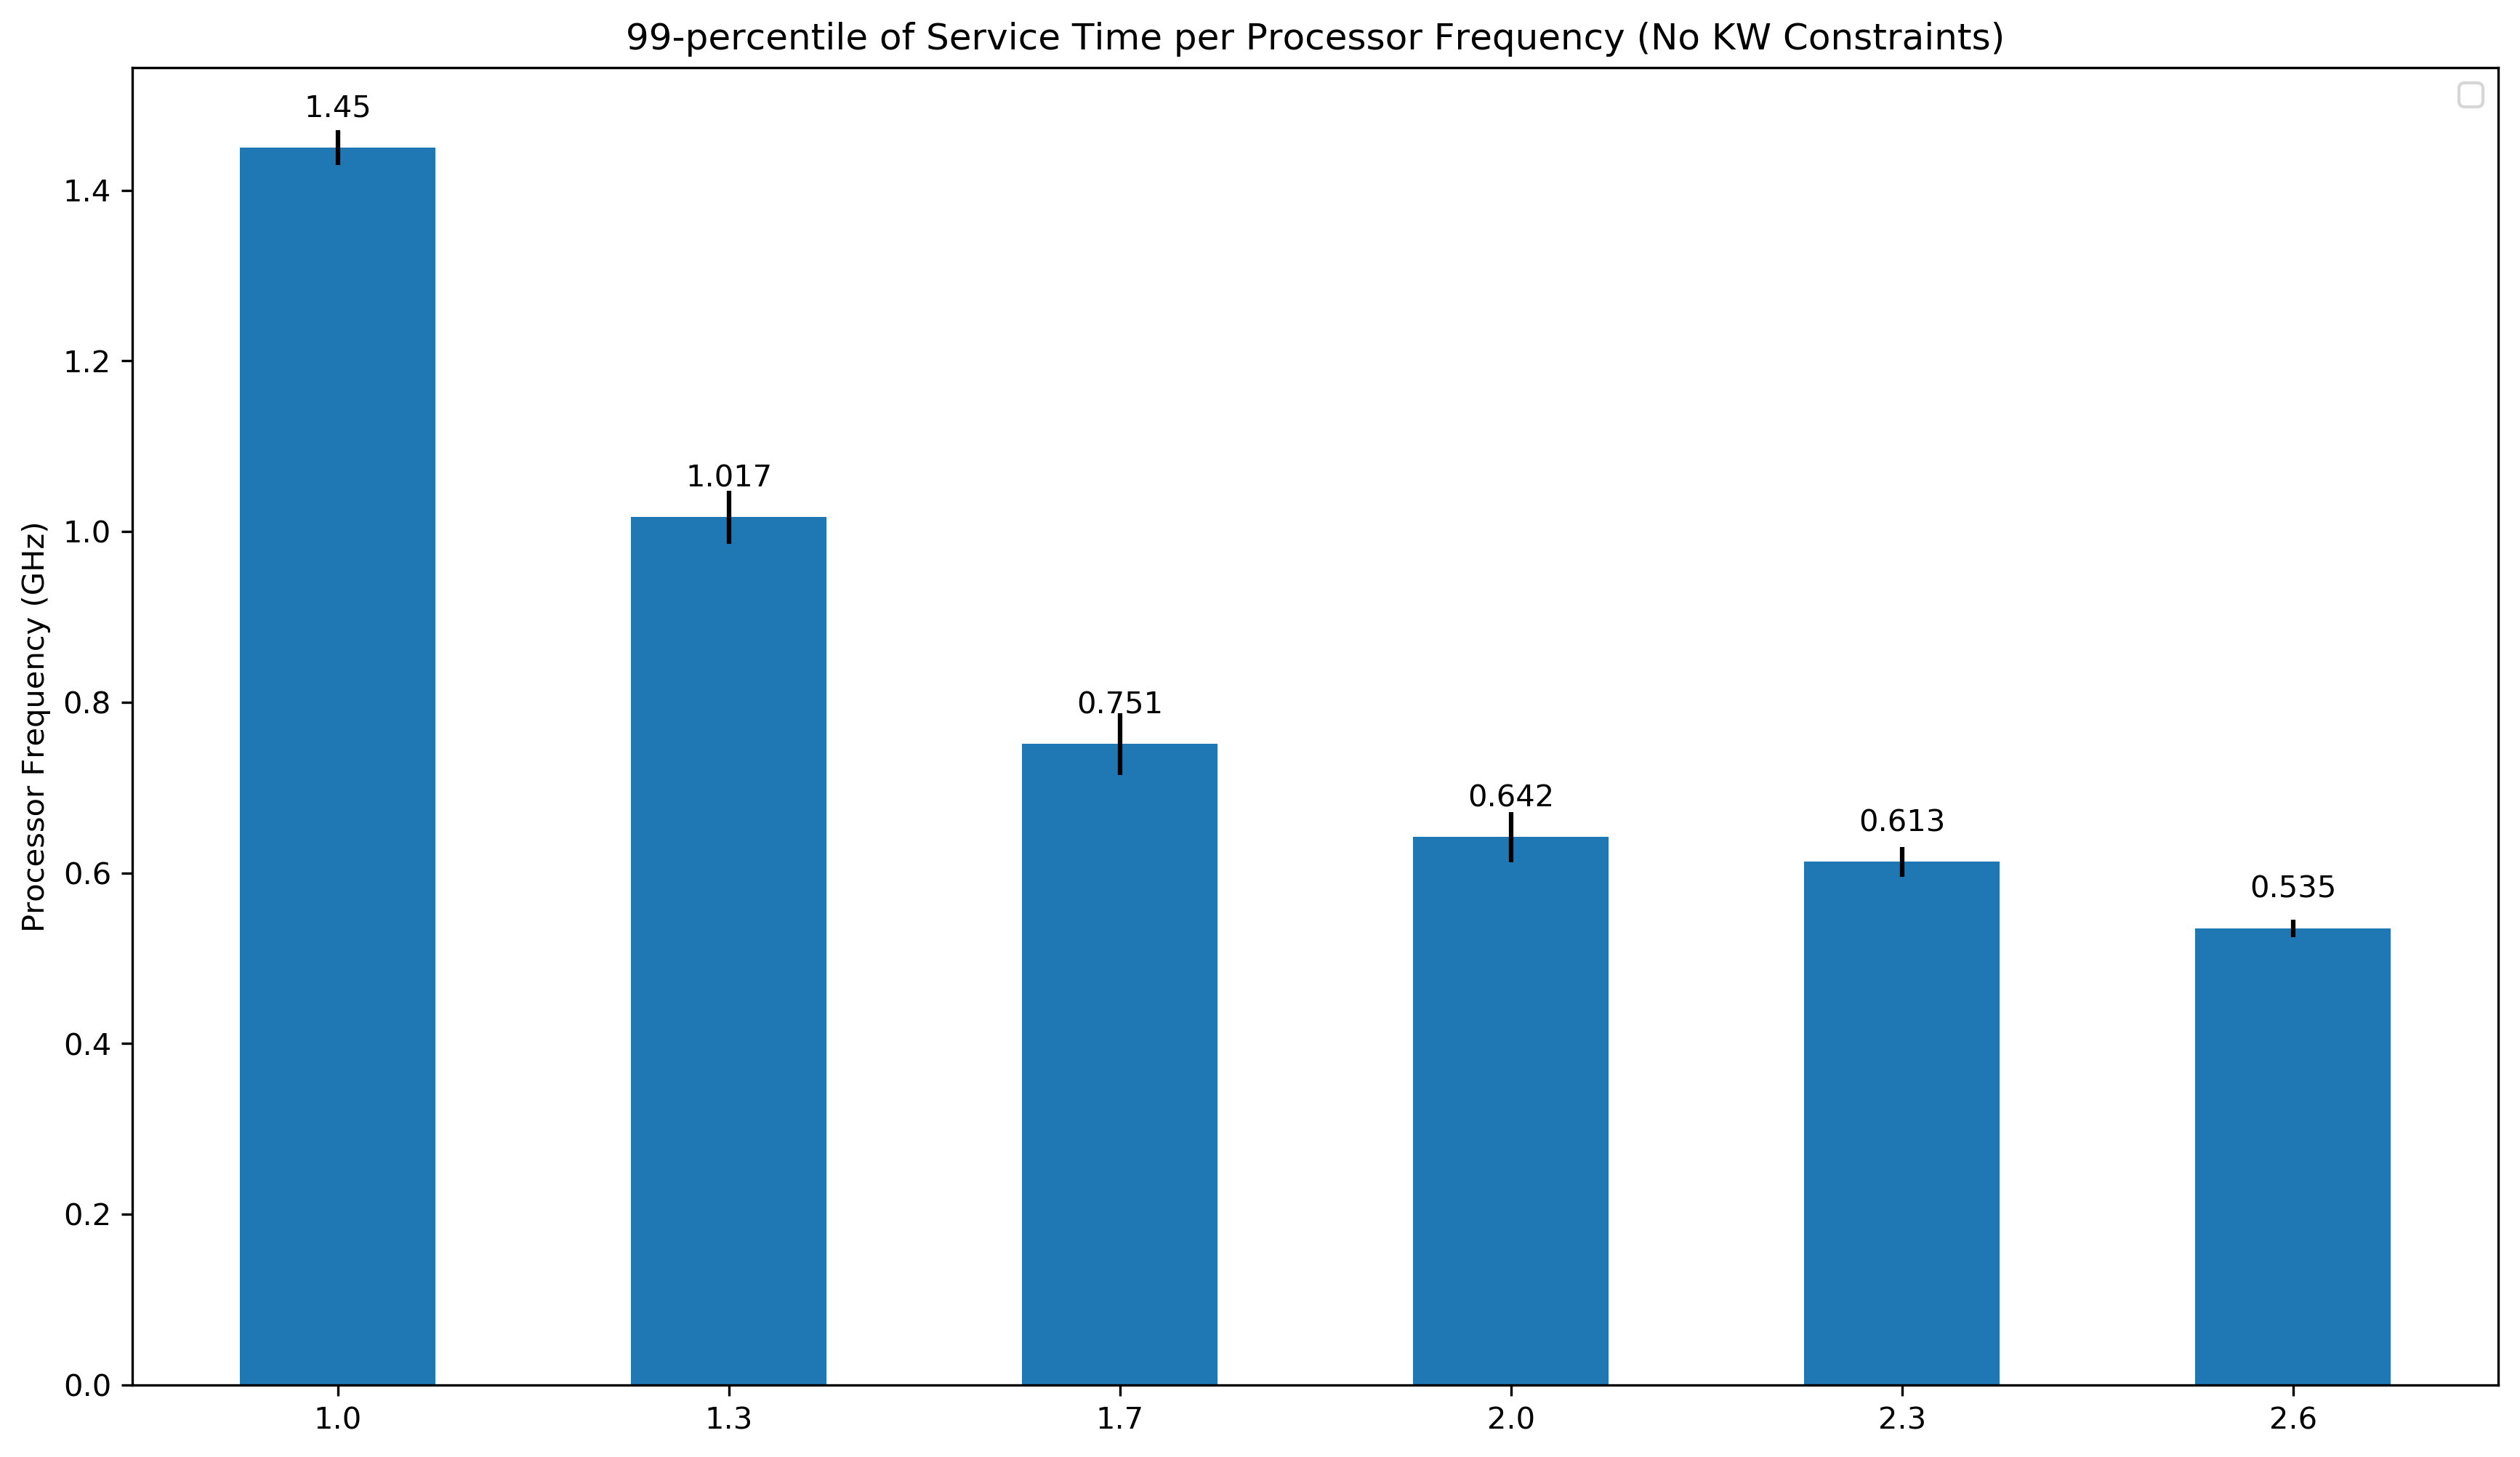

In [34]:
#fig, ax = plt.subplots(figsize=(18,20), dpi=300)

labels = ['1.0', '1.3', '1.7', '2.0', '2.3', '2.6']
men_means = [stmixed_10.mean(), stmixed_13.mean(), stmixed_17.mean(), stmixed_20.mean(), stmixed_23.mean(), stmixed_26.mean()]
men_std = [stmixed_10.std(), stmixed_13.std(), stmixed_17.std(), stmixed_20.std(), stmixed_23.std(), stmixed_26.std()]
men_means = np.round(men_means, 3)

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8), dpi=300)
rects1 = ax.bar(x, men_means, width, yerr=men_std)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('99-percentile of Service Time per Processor Frequency (No KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 8),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\processor_frequencies.png')

In [4]:
# Lemma 2 - Energy Consumption
stmixed_10_low = np.array([ 0.340, 0.418, 0.383]) # Rerun? Agents = 8, Time = 10 mins / 600s
stmixed_10_high = np.array([ 2.475, 2.475, 2.475])
stmixed_26_low = np.array([ 0.208, 0.190, 0.208])
stmixed_26_high = np.array([ 1.450, 1.450, 1.500])

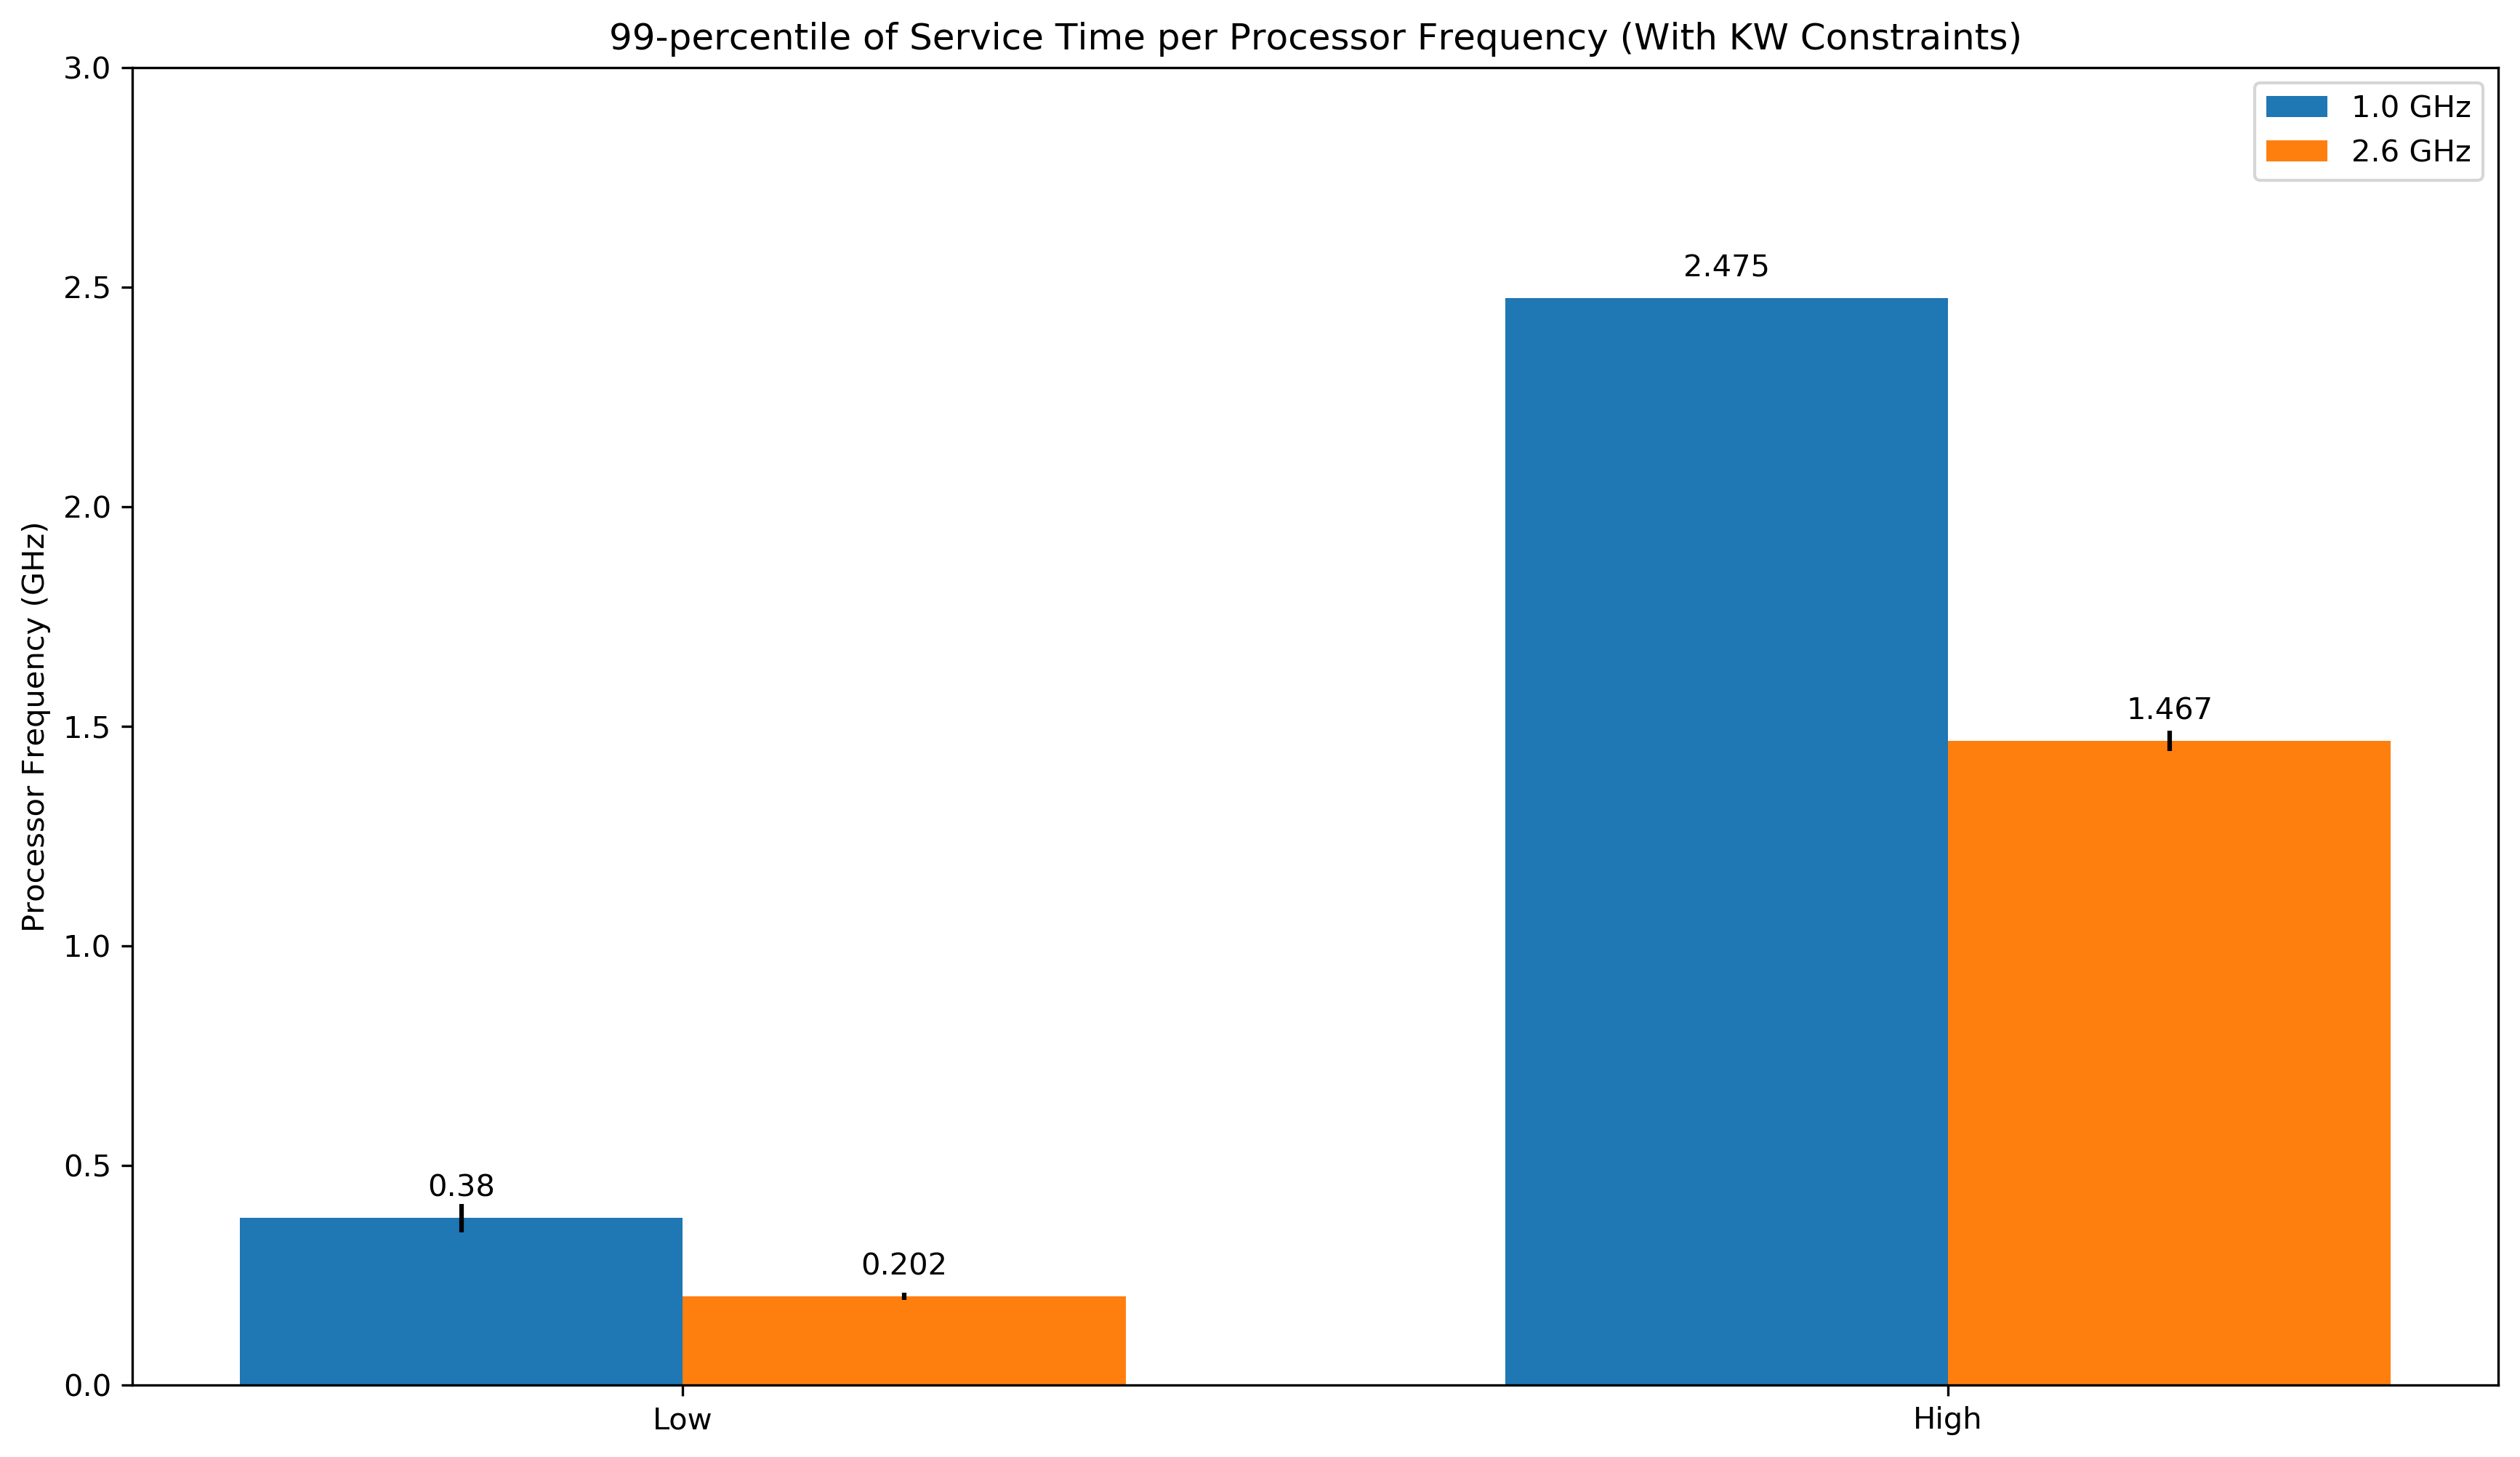

In [8]:
labels = ['Low', 'High']
stmixed_10 = [stmixed_10_low.mean(), stmixed_10_high.mean()]
stmixed_10_std = [stmixed_10_low.std(), stmixed_10_high.std()]
stmixed_10 = np.round(stmixed_10, 3)
stmixed_26 = [stmixed_26_low.mean(), stmixed_26_high.mean()]
stmixed_26_std = [stmixed_26_low.std(), stmixed_26_high.std()]
stmixed_26 = np.round(stmixed_26, 3)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8), dpi=300)
rects1 = ax.bar(x - width/2, stmixed_10, width, yerr=stmixed_10_std, label="1.0 GHz")
rects2 = ax.bar(x + width/2, stmixed_26, width, yerr=stmixed_26_std, label="2.6 GHz")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('99-percentile of Service Time per Processor Frequency (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0,3)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\keyword_influences.png')

In [9]:
stmixed_10_low = np.array([ 14.70, 14.58, 14.72])
stmixed_10_high = np.array([ 30.68, 30.95, 31.04])
stmixed_26_low = np.array([ 15.21, 15.57, 15.91])
stmixed_26_high = np.array([ 63.03, 63.34]) # Rerun later?

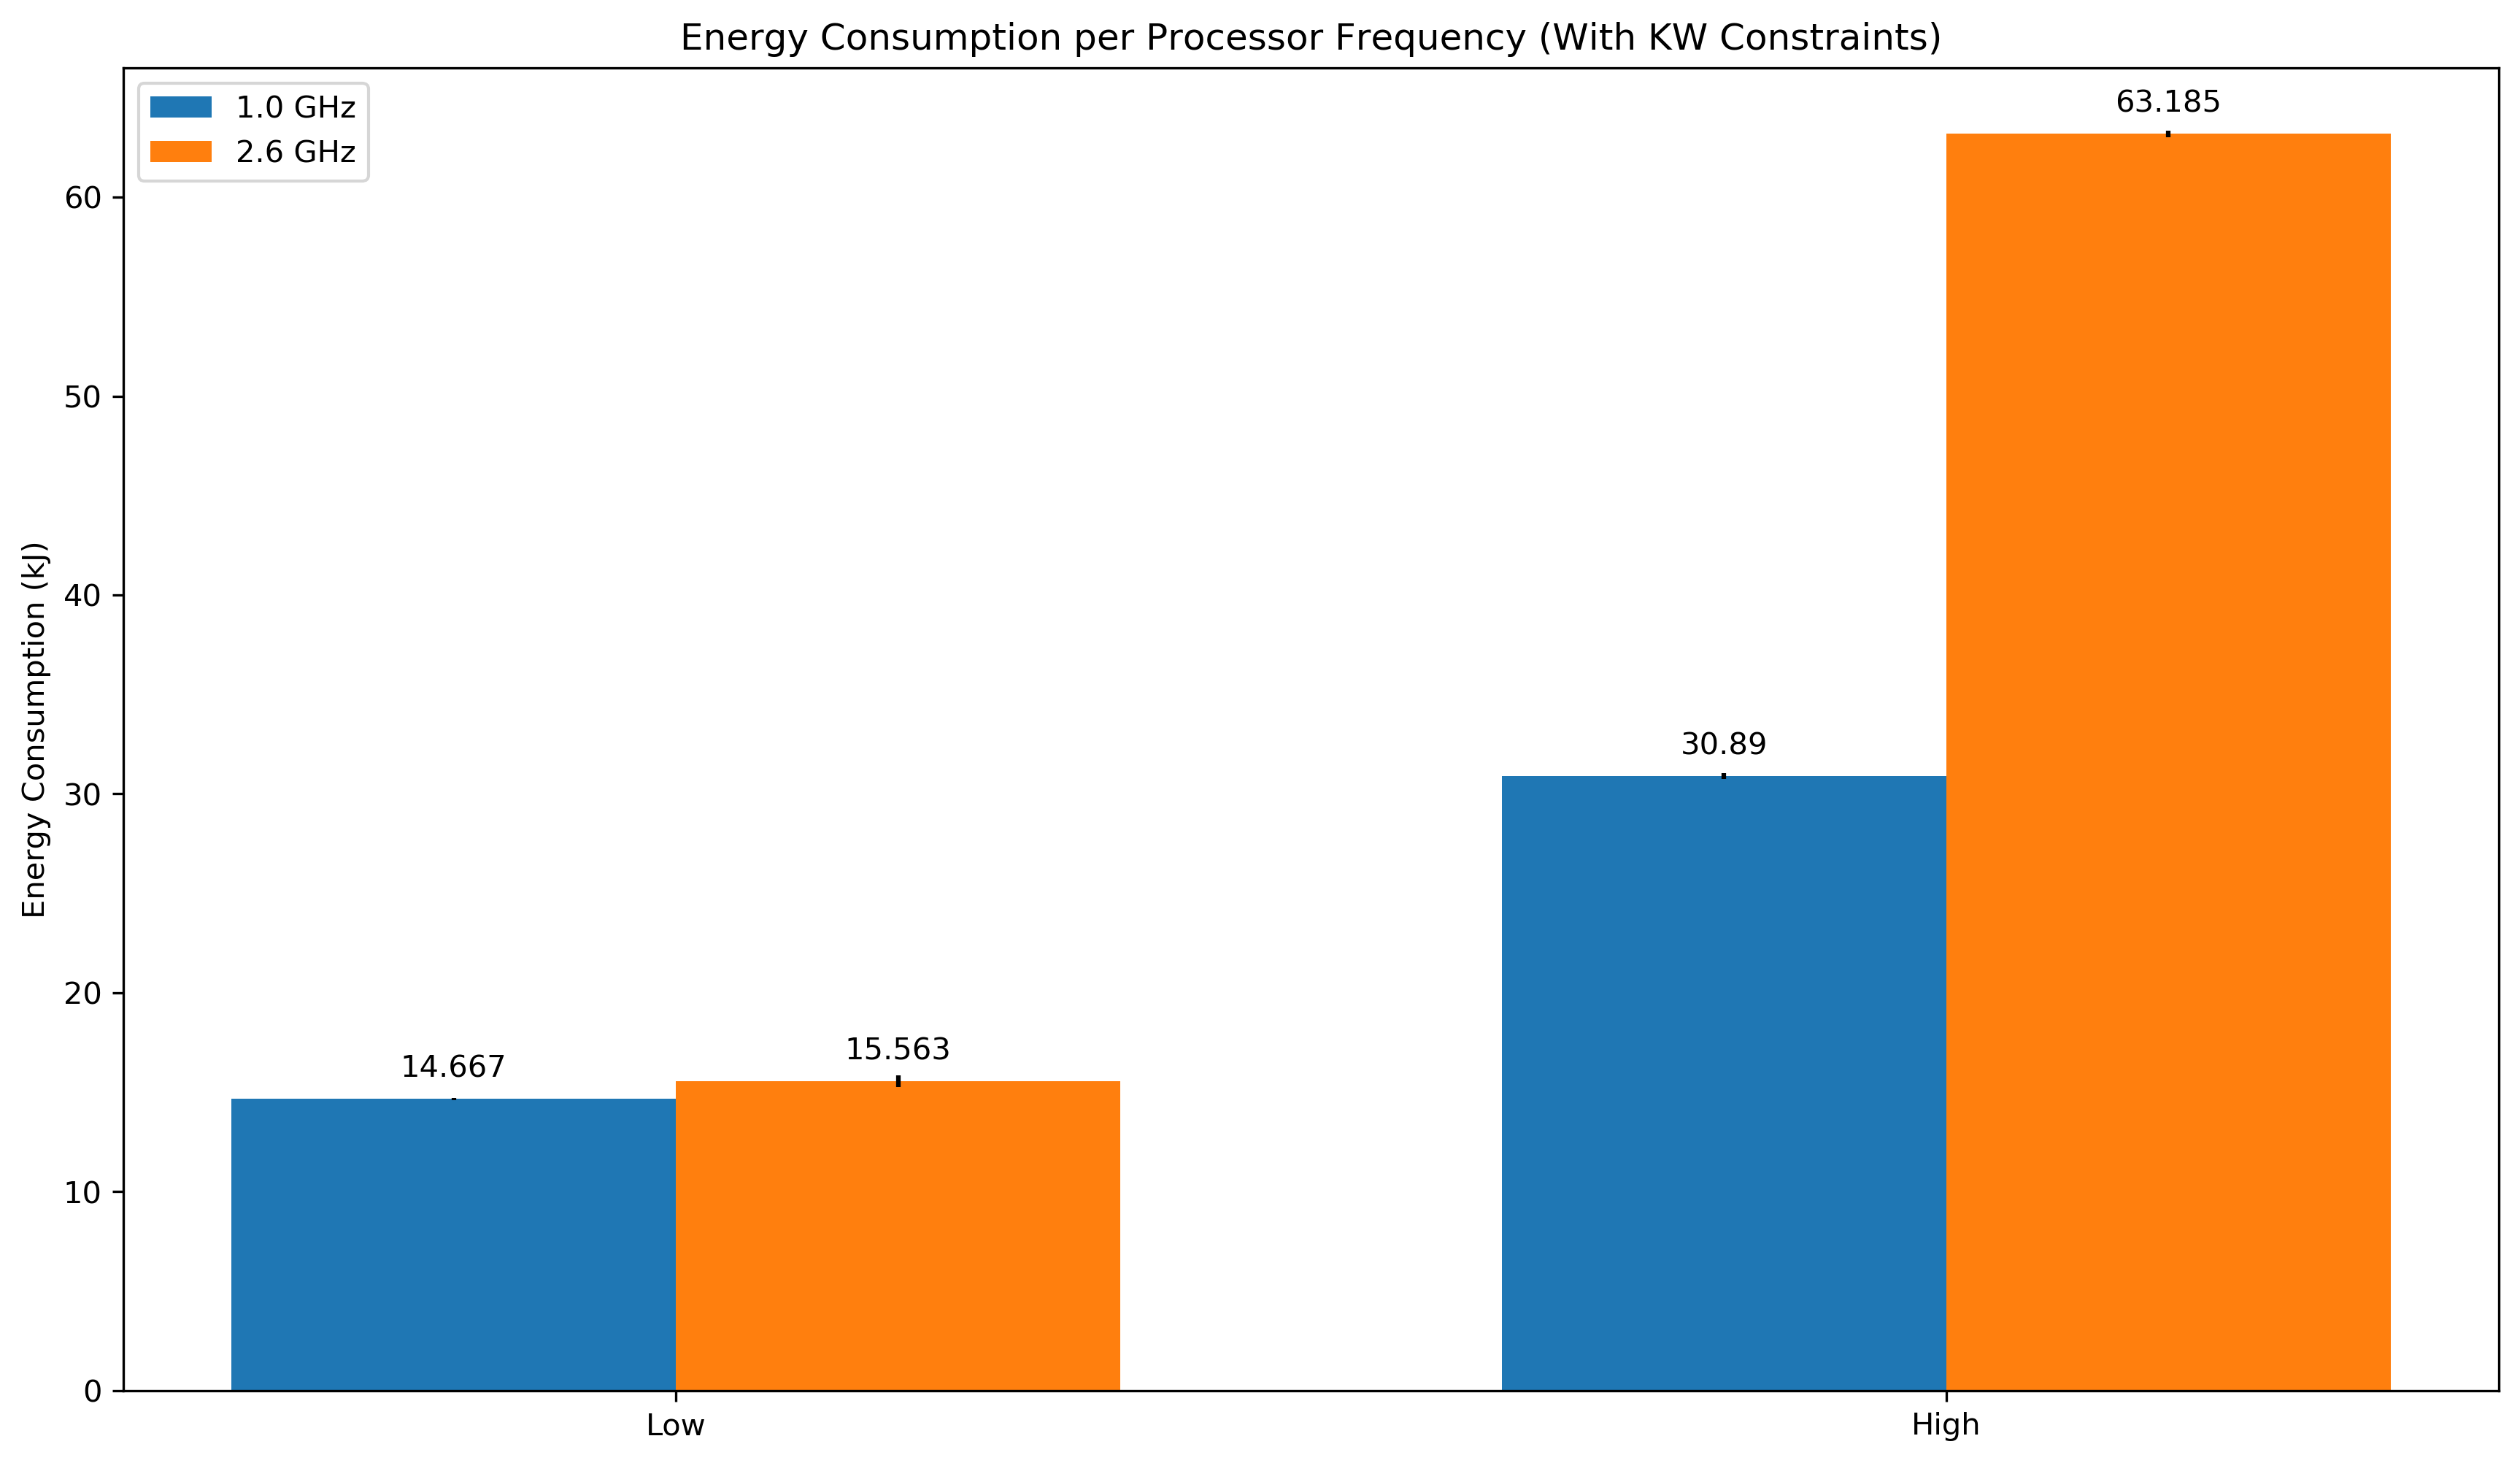

In [12]:
labels = ['Low', 'High']
stmixed_10 = [stmixed_10_low.mean(), stmixed_10_high.mean()]
stmixed_10_std = [stmixed_10_low.std(), stmixed_10_high.std()]
stmixed_10 = np.round(stmixed_10, 3)
stmixed_26 = [stmixed_26_low.mean(), stmixed_26_high.mean()]
stmixed_26_std = [stmixed_26_low.std(), stmixed_26_high.std()]
stmixed_26 = np.round(stmixed_26, 3)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8), dpi=300)
rects1 = ax.bar(x - width/2, stmixed_10, width, yerr=stmixed_10_std, label="1.0 GHz")
rects2 = ax.bar(x + width/2, stmixed_26, width, yerr=stmixed_26_std, label="2.6 GHz")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption per Processor Frequency (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#ax.set_ylim(0,3)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\energy_consumption_per_kwlength.png')